# CS1340 Lab 5

### In this lab, we will be using pandas and scikit-learn for stock price prediction. The packages will be used include numpy, pandas, pandas_datareader, matplotlib, scikit-learn. (You should have installed pandas_datareader from Lab 4)

## Step one, inport all the packages 

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#from sklearn.model_selection import train_test_split X_train, X_test, y_train, y_test = train_test_split(X, y)
from sklearn import neighbors

# This following line will make the plot embedded in this notebook, instead of open a new window
%matplotlib inline 

## Step two, Data preparation

In [2]:
# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2018-12-31'

# stock_list = ['GOOG', 'AAPL', 'MSFT']

goog_data = data.DataReader('GOOG', start=start_date, end=end_date,
                       data_source='yahoo')
goog_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,313.579620,310.954468,312.304413,312.204773,3927000.0,312.204773
2010-01-05,312.747742,309.609497,312.418976,310.829926,6031900.0,310.829926
2010-01-06,311.761444,302.047852,311.761444,302.994293,7987100.0,302.994293
2010-01-07,303.861053,295.218445,303.562164,295.940735,12876600.0,295.940735
2010-01-08,300.498657,293.455048,294.894653,299.885956,9483900.0,299.885956


In [3]:
# Q1, Add two more columns into the dataframe goog_data, hl_pct and pct_change, they are caculated using the following
# equations (10 points): 
# hl_pct = (high - low) / close * 100
# pct_change = (close - open) / open * 100

In [4]:
goog_data['Pct_change'] = ((goog_data['High'] - goog_data['Low'])/(goog_data['Close']*100))
goog_data['Hl_pct'] = ((goog_data['Close'] - goog_data['Open'])/(goog_data['Open']*100))
goog_data.head

<bound method NDFrame.head of                    High          Low         Open        Close      Volume  \
Date                                                                         
2010-01-04   313.579620   310.954468   312.304413   312.204773   3927000.0   
2010-01-05   312.747742   309.609497   312.418976   310.829926   6031900.0   
2010-01-06   311.761444   302.047852   311.761444   302.994293   7987100.0   
2010-01-07   303.861053   295.218445   303.562164   295.940735  12876600.0   
2010-01-08   300.498657   293.455048   294.894653   299.885956   9483900.0   
...                 ...          ...          ...          ...         ...   
2018-12-24  1003.539978   970.109985   973.900024   976.219971   1590300.0   
2018-12-26  1040.000000   983.000000   989.010010  1039.459961   2373300.0   
2018-12-27  1043.890015   997.000000  1017.150024  1043.880005   2109800.0   
2018-12-28  1055.560059  1033.099976  1049.619995  1037.079956   1414800.0   
2018-12-31  1052.699951  1023.5900

In [5]:
# Q2, drop nan values (5 points)

In [6]:
goog_data.dropna()

,High,Low,Open,Close,Volume,Adj Close,Pct_change,Hl_pct
Date,,,,,,,,
2010-01-04,313.579620,310.954468,312.304413,312.204773,3927000.0,312.204773,0.000084,-0.000003
2010-01-05,312.747742,309.609497,312.418976,310.829926,6031900.0,310.829926,0.000101,-0.000051
2010-01-06,311.761444,302.047852,311.761444,302.994293,7987100.0,302.994293,0.000321,-0.000281
2010-01-07,303.861053,295.218445,303.562164,295.940735,12876600.0,295.940735,0.000292,-0.000251
2010-01-08,300.498657,293.455048,294.894653,299.885956,9483900.0,299.885956,0.000235,0.000169
...,...,...,...,...,...,...,...,...
2018-12-24,1003.539978,970.109985,973.900024,976.219971,1590300.0,976.219971,0.000342,0.000024
2018-12-26,1040.000000,983.000000,989.010010,1039.459961,2373300.0,1039.459961,0.000548,0.000510
2018-12-27,1043.890015,997.000000,1017.150024,1043.880005,2109800.0,1043.880005,0.000449,0.000263


In [7]:
# Q3, Create X_train, y_train, X_test and y_test.  (30 points)
# 
# We will be using the last 1% data for testing. 
# We will be only using three features here, 'Volumn', 'hl_pct' and 'pct_change' to predict the target, 'Adj Close'
# Since its a prediction task, we will always be using the data from day t to 
# predict the target 'Adj Close' on day t + 1. For example: If we have the values for 'Volume', 'hl_pct' and 'pct_change'
# for 2010-01-05, we will use that data to predict the 'Adj Close' price on 2010-01-06
# You may also want do some scale on the data
# Hints: preprocessing.scale, shift. 

In [8]:
#create future matrix
#target vector
y = goog_data['Adj Close'].shift(-1).dropna()
x1 = goog_data.loc[:,('Volume', 'Hl_pct', 'Pct_change')]
x = x1.drop(x1.tail(1).index)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.01, shuffle=False)
x_test.head()

,Volume,Hl_pct,Pct_change
Date,,,
2018-11-26,1942800.0,0.000099,0.000147
2018-11-27,1803200.0,0.000033,0.000183
2018-11-28,2475400.0,0.000357,0.000470
2018-11-29,1468900.0,0.000114,0.000168
2018-11-30,2580200.0,0.000049,0.000162


## Step three,  Create Models

In [9]:
# Q4, Import LinearRegression and K-Nearest Neighbor model from scikit-learn (5 points)

In [10]:
#See step one of lab to see imported packages

In [11]:
# Q5, Fit the LinearRegression and K-Nearest Neighbor model using X_train and y_train (10 points)

In [12]:
lin_regression = LinearRegression()  
RegressionModel = lin_regression.fit(x_train, y_train)
knn = neighbors.KNeighborsRegressor(n_neighbors =1)
KnnModel = knn.fit(x_train, y_train)

In [13]:
# Q6, Make prediction using the above two model using X_test and save the results to y_predicted (10 points)

In [14]:
y_predRegression = RegressionModel.predict(x_test)
y_predKnn = KnnModel.predict(x_test)
y_pred = y_predRegression, y_predKnn
print(y_pred)

(array([672.45275391, 705.38138352, 877.20101629, 720.39118747,
       637.52872045, 690.82652195, 890.2133462 , 790.24626096,
       868.11927111, 747.94406715, 741.0477325 , 717.95840162,
       777.91199553, 728.46708452, 845.04070628, 742.80547036,
       901.04840262, 779.27306583, 737.22494403, 834.14268512,
       945.76613614, 883.74009158, 750.71507534]), array([ 762.02001953,  645.44000244,  433.0418396 ,  559.01519775,
        360.27459717,  559.34429932,  514.85021973,  444.66329956,
       1092.25      ,  651.15997314,  762.48999023,  540.34649658,
        932.16998291, 1202.94995117,  764.47998047,  514.01831055,
        607.52783203,  628.        ,  249.10629272,  706.46002197,
        351.82626343,  521.52001953,  748.2800293 ]))


## Step four, Evaluation

In [15]:
# Q7, print the score for these two models (score method) and explain which model is better. (10 points)

In [16]:
R = r2_score(y_test, y_predRegression)
K = r2_score(y_test, y_predKnn)
R1 = metrics.mean_squared_error(y_test, y_predRegression)
K1 = metrics.mean_squared_error(y_test, y_predKnn)
print('Linear Regression:',R)
print('KNN Model:', K)

print('Linear Regression:', R1)
print('KNN Model:', K1)
#the linear regression model is better because it has a lower mse and an r^2 closer to 1.

Linear Regression: -75.92062312237375
KNN Model: -218.8120838108184
Linear Regression: 77582.77902894706
KNN Model: 221704.29247636657


In [17]:
# Q8, plot the 'Adj Close' price (y_train) together with the prediction (y_predicted)
# from LinearRegression model. (10 points)

C:\Users\pavlo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


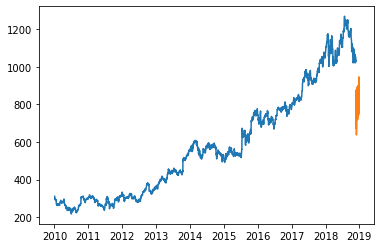

In [18]:
df = pd.DataFrame(y_predRegression, index=y_test.index) #convert y_predRegression to dataframe with date index
plt.plot(y_train)
plt.plot(df) 

In [19]:
# Q9, Pick another model (you pick), do the fitting, prediction and evaluation (10 points)

MSE: 70702.28397746352
R^2 Score: -69.09885193326679


C:\Users\pavlo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


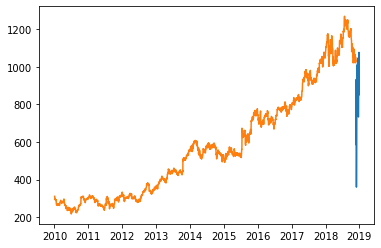

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
Forest = RandomForestRegressor()
ForestModel = Forest.fit(x_train, y_train)
y_predForest = ForestModel.predict(x_test)
F = r2_score(y_test, y_predForest)
F1 = metrics.mean_squared_error(y_test, y_predForest)
print('MSE:', F1)
print('R^2 Score:', F)
DfForest = pd.DataFrame(y_predForest, index=y_test.index)
plt.plot(DfForest)
plt.plot(y_train)